Élasticité des polymères --- quelques simulations

In [ ]:
Modèle n°1 : modèle sans interaction

In [24]:
# Tout d'abord, les bibliothèques de fonctions sont chargées
import matplotlib.pyplot as plt # importer le module Matplotlib comme "plt"
import numpy as np # importer le module NumPy comme "np"
from numpy.random import rand
import sys
from matplotlib import rc # Permet l'utilisation de LateX dans les
#legendes des figures
import string # traitement des chaînes de caractères
from itertools import product # Pour itérer rapidement sur des listes
import copy

In [54]:
# Modèle n°1 : celui de l'énoncé, sans interaction
N = 10 # pour des raisons pratiques, il vaut mieux choisir un entier pair
l = 1
# Paramètre à changer pour faire varier la longueur de la chaïne : Delta L/a.
# Par définition, ce nombre doit être un ENTIER PAIR (sinon des problèmes de définition apparaissent).
# Au niveau du signe, il peut être positif (étirement), ou négatif (compression).
# En pratique, Delta L/a << L, donc ce nombre peut prendre n'importe quelle valeur réelle.
# Mais l'ordinateur n'aime pas tracer 10^24 segments...
DL_a = +2

# Calcul des valeurs de N_+ et N_- correspondantes
N_p = int(N/2 + DL_a/2)
N_m = int(N/2 - DL_a/2)

# Définition de la séquence de segments
n = min(N_p, N_m) # Assure que le nombre de segments total a bien pour longueur L
Rand = True # Détermine si le tirage aléatoire est nécessaire.
polymere = [0] # Longueur du polymère
type_poly = [] # Séquance de types de sengments
long = 0 # Calcul de la longueur totale du polymère
if (n == N_p):
    Plus = True
else:
    Plus = False
for i in range(N):
    if Rand:
        x = np.random.random() # tirage d'un nombre aléatoire uniformément distribué entre 0 et 1
        y = int(2*x) # partie entière valant 1 si x >= 1/2, 0 sinon.
    if (y == 1):
        long += 4/3
        polymere.append(long)
        type_poly.append('long')
        if Plus:
            n -= 1
    else:
        long += 2/3
        polymere.append(long)
        type_poly.append('short')
    if (n ==0):
        Rand = False
        if Plus:
            y = 0
        else:
            y = 1


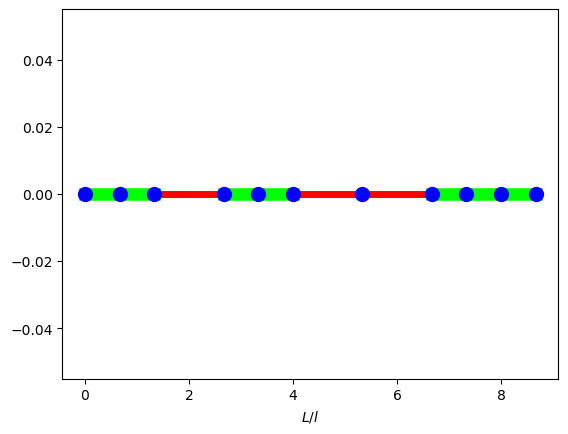

In [58]:
# Représentation du polymere correspondant
fig, ax = plt.subplots()
for i in range(N):
    if (type_poly[i] == 'long'):
        plt.plot([polymere[i], polymere[i+1]], [0,0], color = 'red', linewidth = '5')
    else:
        plt.plot([polymere[i], polymere[i+1]], [0,0], color = 'lime', linewidth = '9')
    plt.plot(polymere[i], 0, 'bo', markersize = '10')
plt.plot(polymere[N], 0, 'bo', markersize = '10')
plt.xlabel(r'$L/l$')
plt.show()

In [ ]:
Modèle 2 : modèle avec interaction

In [172]:
# Le traitement du modèle avec interactions est beaucoup plus compliqué que le modèle sans interaction.
# On pourra donc, au moins dans un premier temps, utiliser le code suivant tel quel, sans refaire les calculs
# qui mènent à la détermination de la densité de probabilité.

# Dans ce modèle, nous introduisons deux modifications majeures :
# 1) un segment du polymère peut rester à sa longueur de repos l, sans être étiré ou comprimé.
# 2) les segments interagissent avec leurs voisins : le fait de comprimer, ou d'étirer un voisin a un coût en énergie.

# Définition des paramètres :
N = 6 # On évitera les nombres trop grands pour lesquels le nombre de configurations accessibles croît rapidement,
# au risque de faire exploser le temps de calcul.
Dl_a = 4 # On choisira un entier pair dans la limite du possible.

N_p = int(N/2) # Nombre de segments étirés
N_m = int(N/2) # Nombre de segments comprimés
N_n = 0 # nombre de segments neutres
N_r = N # nombre de segments de taille indéterminée, voir ci-dessous.

# Calcul de toutes les configurations
# Ce modèle autorise plusieurs configurations donnant lieu à la même longueur finale : un segment de taille 2l peut être soit
# une série de deux segments neutres, soit un segment étiré et un segment comprimé.
n = int(N_r + Dl_a) # Nombre total de segments sur la longueur donnée
Config = {} # Variable pour stocker toutes les configurations
while (n >= 0):
    Config[str(n)] = {} # Les configurations sont classées par nombre de segments neutres pour être sûr de ne pas en oublier
    n -= 2 # Les configurations avec un nombre impair de segments neutres ne peuvent pas tous les convertir en paires (comprimé,étiré)
    # tout en gardant la longueur totale du polymère fixe

for key in Config.keys():
    n = int(key)
    n_n = int(n) # nombre de segments neutres dans cette configuration
    n_p = int((N - n + Dl_a)/2) # nombre de segments étirés dans cette configuration
    n_m = int((N - n + Dl_a)/2) # nombre de segments comprimés dans cette configuration
    #print(n_n, n_p, n_m, n, N)
    n_conf = 0 # Compte le nombre de configurations
    res = list(product(range(0, 3), repeat = N + Dl_a)) # Calcul de toutes les séries possibles de N + Dl_a chiffres entre 0 et 2
    res.append(tuple(np.linspace(0, 0, N, dtype = int))) # Il faut rajouter la configuration avec que des 0 ...
    res.append(tuple(np.linspace(2, 2, N, dtype = int))) # ... et celle avec que des 2
    res_fix = copy.deepcopy(res) # astuce technique pour faire des copies de listes
    length = len(res_fix) # Sinon len(res) est mis à jour en cours de boucle
    for i in range(length): # Il faut enlever toutes les séries de chiffres qui ne correspondent pas à la bonne longueur de polymère.
        n_0 = 0 # nombre de 0 dans la liste
        n_1 = 0 # nombre de 1 dans la liste
        n_2 = 0 # nombre de 2 dans la liste
        for j in range(len(res_fix[i])):
            if (res_fix[i][j] == 0):
                n_0 += 1
            elif (res_fix[i][j] == 1):
                n_1 += 1
            else:
                n_2 += 1
        if ((n_0 != n_n) or (n_1 != n_p) or (n_2 != n_m)): # Si la longueur n'est pas bonne, la configuration est retirée
            continue
            res.pop(i)
        else:
            Config[key][str(n_conf)] = res[i] # sauvegarde de la configuration
            n_conf += 1


In [173]:
# Pour vérifier que le programme calcule bien ce qu'il faut.
print(Config)

{'10': {'0': (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)}, '8': {'0': (0, 0, 0, 0, 0, 0, 0, 0, 1, 2), '1': (0, 0, 0, 0, 0, 0, 0, 0, 2, 1), '2': (0, 0, 0, 0, 0, 0, 0, 1, 0, 2), '3': (0, 0, 0, 0, 0, 0, 0, 1, 2, 0), '4': (0, 0, 0, 0, 0, 0, 0, 2, 0, 1), '5': (0, 0, 0, 0, 0, 0, 0, 2, 1, 0), '6': (0, 0, 0, 0, 0, 0, 1, 0, 0, 2), '7': (0, 0, 0, 0, 0, 0, 1, 0, 2, 0), '8': (0, 0, 0, 0, 0, 0, 1, 2, 0, 0), '9': (0, 0, 0, 0, 0, 0, 2, 0, 0, 1), '10': (0, 0, 0, 0, 0, 0, 2, 0, 1, 0), '11': (0, 0, 0, 0, 0, 0, 2, 1, 0, 0), '12': (0, 0, 0, 0, 0, 1, 0, 0, 0, 2), '13': (0, 0, 0, 0, 0, 1, 0, 0, 2, 0), '14': (0, 0, 0, 0, 0, 1, 0, 2, 0, 0), '15': (0, 0, 0, 0, 0, 1, 2, 0, 0, 0), '16': (0, 0, 0, 0, 0, 2, 0, 0, 0, 1), '17': (0, 0, 0, 0, 0, 2, 0, 0, 1, 0), '18': (0, 0, 0, 0, 0, 2, 0, 1, 0, 0), '19': (0, 0, 0, 0, 0, 2, 1, 0, 0, 0), '20': (0, 0, 0, 0, 1, 0, 0, 0, 0, 2), '21': (0, 0, 0, 0, 1, 0, 0, 0, 2, 0), '22': (0, 0, 0, 0, 1, 0, 0, 2, 0, 0), '23': (0, 0, 0, 0, 1, 0, 2, 0, 0, 0), '24': (0, 0, 0, 0, 1, 2, 0, 0, 0, 0), '25': (0

In [174]:
# Définition du modèle en termes énergétiques.
# L'idée est qu'étirer ou comprimer un segment coûte de l'energie, en accord avec la loi de Hooke.
# Pour chaque segment, nous calculons donc la force appliquée à chaque extrémité et en déduisons un coût énergétique.

def energie(x,y):
    # x et y sont les forces aux deux extémités
    return (x - y)^2

# Si les deux forces agissent dans le même sens, le segment a sa longueur à vide, et energie = 0.
# Si les deux forces agissent en sens contraire, le segment a une énergie positive.
# L'énergie étant définie à une constante près, nous pouvons conserver le carré de la loi de Hooke.

# Nous devons également déterminer des conditions aux bords. Pour simplifier, nous prenons le modèle suivant : si
# l'extrémité est comprimée, alors le mur comprime, si elle est étirée, il étire, si elle est neutre, le bord est libre.

T = 1 # k_B T
# Calcul de la fonction de partition. Il faut sommer sur toutes les configurations.
Z = 0 # Fonction de partition
for key in Config.keys(): # Somme sur toutes les configurations
    for key2 in Config[key].keys():
        conf = Config[key][key2] # Raccourci d'écriture
        e = 0 # énergie de la configuration
        for i in range(len(conf)):            
            if (i == 0): # traitement des conditions de bord à gauche
                if (conf[0] == 0):
                    x_1 = 0 # Force exercée sur l'extrémité gauche du premier segment
                elif (conf[0] == 1):
                    x_1 = 1
                else:
                    x_1 = -1
                if (conf[1] == 0):
                    x_2 = 0 # Force exercée à l'extrémité droite du segment.
                elif (conf[1] == 1):
                    x_2 = 1
                else:
                    x_2 = -1
            elif (i == len(conf) - 1): # traitement des conditions de bord à droite
                if (conf[i] == 0):
                    x_2 == 0
                elif (conf[i] == 1):
                    x_2 = 1
                else:
                    x_2 = -1
                if (conf[i-1] == 0):
                    x_1 =0
                elif (conf[i-1] == 1):
                    x_1 = 1
                else:
                    x_1 = -1
            else: # Cas générique
                if (conf[i] == 0):
                    x_2 == 0
                elif (conf[i] == 1):
                    x_2 = 1
                else:
                    x_2 = -1
                if (conf[i-1] == 0):
                    x_1 =0
                elif (conf[i-1] == 1):
                    x_1 = 1
                else:
                    x_1 = -1
            e += energie(x_1, x_2)
        Z += np.exp(-e/T)
                

In [185]:
# Calcul des probabilités associées à chaque configuration
# Pour le tirage final, nous concaténons ces probabilités sur le segment [0;1]
listP_tot = [0] # Futur segment [0;1] découpé suivant les probabilités des configurations
listP = [] # Liste de toutes les probabilités individuelles
list_conf = [] # Liste des configurations associées
for key in Config.keys(): # Somme sur les configurations
    for key2 in Config[key].keys():
        conf = Config[key][key2]
        e = 0 # énergie
        P = 0 # probabilité
        for i in range(len(conf)):            
            if (i == 0):
                if (conf[0] == 0):
                    x_1 = 0 
                elif (conf[0] == 1):
                    x_1 = 1
                else:
                    x_1 = -1
                if (conf[1] == 0):
                    x_2 = 0
                elif (conf[1] == 1):
                    x_2 = 1
                else:
                    x_2 = -1
            elif (i == len(conf) - 1):
                if (conf[i] == 0):
                    x_2 == 0
                elif (conf[i] == 1):
                    x_2 = 1
                else:
                    x_2 = -1
                if (conf[i-1] == 0):
                    x_1 =0
                elif (conf[i-1] == 1):
                    x_1 = 1
                else:
                    x_1 = -1
            else:
                if (conf[i] == 0):
                    x_2 == 0
                elif (conf[i] == 1):
                    x_2 = 1
                else:
                    x_2 = -1
                if (conf[i-1] == 0):
                    x_1 =0
                elif (conf[i-1] == 1):
                    x_1 = 1
                else:
                    x_1 = -1
            e += energie(x_1, x_2)
        P = np.exp(-e/T)/Z
        listP.append(P)
        listP_tot.append(listP_tot[-1] + P)
        list_conf.append(conf)


In [189]:
# Une fois la partie précédente du programme ajustée, il est possible de revenir plusieurs fois à cette cellule pour
# obtenir une nouvelle configuration aléatoirement choisie parmi la liste précédemment générée.

# Tirage de la configuration aléatoire
x = np.random.random()
# Parcours du segment [0;1] pour trouver à quelle configuration correspond le nombre tiré.
index = 0
for i in range(len(listP_tot)):
    if (listP_tot[i] > x):
        index = i - 1 # indice de la configuration associée
        break
    else:
        continue

# configuration tirée au hasard
config = list_conf[index]

In [190]:
print(config)

(2, 1, 0, 0, 0, 0, 0, 0, 1, 2)


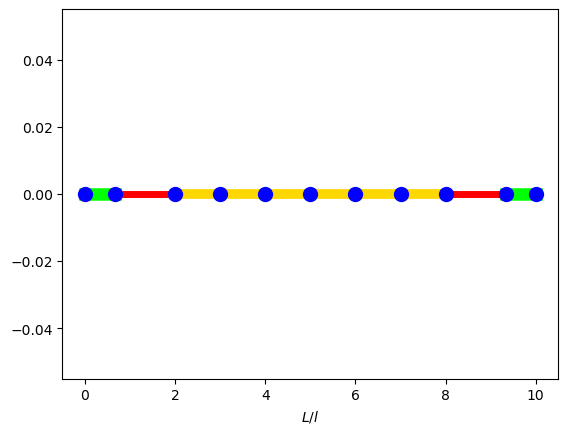

In [191]:
# Conversion de l'information de la configuration en input correct pour la représentation graphique.
polymere = [0] # Longueur du polymère
type_poly = [] # Séquence de types de sengments
long = 0 # Calcul de la longueur totale du polymère

for i in range(N + Dl_a):
    if (config[i] == 1):
        long += 4/3
        polymere.append(long)
        type_poly.append('long')
    elif (config[i] == 0):
        long += 1
        polymere.append(long)
        type_poly.append('neutral')        
    else:
        long += 2/3
        polymere.append(long)
        type_poly.append('short')

# Représentation du polymere correspondant
fig, ax = plt.subplots()
for i in range(N + Dl_a):
    if (type_poly[i] == 'long'):
        plt.plot([polymere[i], polymere[i+1]], [0,0], color = 'red', linewidth = '5')
    elif (type_poly[i] == 'neutral'):
        plt.plot([polymere[i], polymere[i+1]], [0,0], color = 'gold', linewidth = '7')
    else:
        plt.plot([polymere[i], polymere[i+1]], [0,0], color = 'lime', linewidth = '9')
    plt.plot(polymere[i], 0, 'bo', markersize = '10')
plt.plot(polymere[N + Dl_a], 0, 'bo', markersize = '10')
plt.xlabel(r'$L/l$')
plt.show()